In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
userName = 'TheChessRizzard69'

In [3]:
all = open(r"C:\Users\colin\Downloads\chess_com_games_2023-07-04 (2).txt", "r")
allList = []
for i in all:
    if i[0] == '[':
        allList.append(i)
    

games = "\n".join(allList)

#print(games)
    

gamesInfo = games.split('[Event "Live Chess"]\n\n[Site "Chess.com"]')

#print(gamesInfo)

gamesData = []

for i in gamesInfo:
    v = i.replace('\n', '')
    gamesData.append(v)

print(gamesData)

with open(r"C:\Users\colin\OneDrive\Documents\cdoe\dataGamesChess.txt", "w") as output:
    output.write(str(gamesData))

['', '[Date "2022.03.07"][Round "-"][White "Petit-Poulain"][Black "TheChessRizzard69"][Result "1-0"][WhiteElo "792"][BlackElo "898"][TimeControl "600"][EndTime "4:04:50 PST"][Termination "Petit-Poulain won by resignation"]', '[Date "2022.03.07"][Round "-"][White "amandaxjensen"][Black "TheChessRizzard69"][Result "1-0"][WhiteElo "933"][BlackElo "885"][TimeControl "600"][EndTime "4:09:45 PST"][Termination "amandaxjensen won by resignation"]', '[Date "2022.03.07"][Round "-"][White "TheChessRizzard69"][Black "DonaldAllkoshaj"][Result "0-1"][WhiteElo "871"][BlackElo "877"][TimeControl "600"][EndTime "4:27:50 PST"][Termination "DonaldAllkoshaj won by checkmate"]', '[Date "2022.03.07"][Round "-"][White "donnacarmela"][Black "TheChessRizzard69"][Result "0-1"][WhiteElo "854"][BlackElo "884"][TimeControl "600"][EndTime "4:31:58 PST"][Termination "TheChessRizzard69 won by resignation"]', '[Date "2022.03.26"][Round "-"][White "TheChessRizzard69"][Black "ColinHarwood"][Result "1-0"][WhiteElo "884"]

In [4]:
data = open(r"C:\Users\colin\OneDrive\Documents\cdoe\dataGamesChess.txt", 'r')
type(data)
file = data.read()
dataSort = file.split(',')
df = pd.DataFrame(dataSort)
print(df.head(30))

                                                    0
0                                                 [''
1    '[Date "2022.03.07"][Round "-"][White "Petit-...
2    '[Date "2022.03.07"][Round "-"][White "amanda...
3    '[Date "2022.03.07"][Round "-"][White "TheChe...
4    '[Date "2022.03.07"][Round "-"][White "donnac...
5    '[Date "2022.03.26"][Round "-"][White "TheChe...
6    '[Date "2022.03.26"][Round "-"][White "ColinH...
7    '[Date "2022.03.28"][Round "-"][White "TheChe...
8    '[Date "2022.04.06"][Round "-"][White "Ermak2...
9    '[Date "2022.05.10"][Round "-"][White "TheChe...
10   '[Date "2022.05.20"][Round "-"][White "TheChe...
11   '[Date "2023.02.18"][Round "-"][White "TheChe...
12   '[Date "2023.03.04"][Round "-"][White "Calvin...
13   '[Date "2023.03.04"][Round "-"][White "TheChe...
14   '[Date "2023.03.04"][Round "-"][White "Calvin...
15   '[Date "2023.03.04"][Round "-"][White "Calvin...
16   '[Date "2023.03.04"][Round "-"][White "Calvin...
17   '[Date "2023.03.04"][Ro

In [5]:
df.drop(0, axis=0, inplace=True)
df.head(10)

,0
1,"'[Date ""2022.03.07""][Round ""-""][White ""Petit-..."
2,"'[Date ""2022.03.07""][Round ""-""][White ""amanda..."
3,"'[Date ""2022.03.07""][Round ""-""][White ""TheChe..."
4,"'[Date ""2022.03.07""][Round ""-""][White ""donnac..."
5,"'[Date ""2022.03.26""][Round ""-""][White ""TheChe..."
6,"'[Date ""2022.03.26""][Round ""-""][White ""ColinH..."
7,"'[Date ""2022.03.28""][Round ""-""][White ""TheChe..."
8,"'[Date ""2022.04.06""][Round ""-""][White ""Ermak2..."
9,"'[Date ""2022.05.10""][Round ""-""][White ""TheChe..."
10,"'[Date ""2022.05.20""][Round ""-""][White ""TheChe..."


In [6]:

df['date'] = df[0].apply(lambda x: x.split(']')[0])
df['black'] = df[0].apply(lambda x: x.split(']')[3])
df['score'] = df[0].apply(lambda x: x.split(']')[4])
df['endtime'] = df[0].apply(lambda x: x.split(']')[8])


In [7]:
df['white'] = df[0].apply(lambda x: x.split(']')[2])

In [8]:
gamesDf = df.drop(0, axis = 1)

In [9]:
gamesDf.head(1)

,date,black,score,endtime,white
1,"'[Date ""2022.03.07""","[Black ""TheChessRizzard69""","[Result ""1-0""","[EndTime ""4:04:50 PST""","[White ""Petit-Poulain"""


In [10]:
gamesDf.drop('black', axis = 1, inplace = True)
gamesDf.head(1)

,date,score,endtime,white
1,"'[Date ""2022.03.07""","[Result ""1-0""","[EndTime ""4:04:50 PST""","[White ""Petit-Poulain"""


In [11]:
gamesDf['white'] = gamesDf['white'].apply(lambda x: userName in x)
gamesDf.head(1)

,date,score,endtime,white
1,"'[Date ""2022.03.07""","[Result ""1-0""","[EndTime ""4:04:50 PST""",False


In [12]:
gamesDf.drop('date', axis = 1, inplace = True)
gamesDf.head(20)


,score,endtime,white
1,"[Result ""1-0""","[EndTime ""4:04:50 PST""",False
2,"[Result ""1-0""","[EndTime ""4:09:45 PST""",False
3,"[Result ""0-1""","[EndTime ""4:27:50 PST""",True
4,"[Result ""0-1""","[EndTime ""4:31:58 PST""",False
5,"[Result ""1-0""","[EndTime ""8:26:47 PDT""",True
6,"[Result ""1-0""","[EndTime ""8:41:59 PDT""",False
7,"[Result ""0-1""","[EndTime ""2:54:30 PDT""",True
8,"[Result ""1-0""","[EndTime ""8:00:56 PDT""",False
9,"[Result ""0-1""","[EndTime ""22:59:03 PDT""",True
10,"[Result ""0-1""","[EndTime ""0:20:06 PDT""",True


In [13]:

def winCheck2(sco):
    if userName in str(sco["white"]) and '1-0' in str(sco['score']):
        return 1
    if userName not in str(sco["white"]) and '0-1' in str(sco['score']):
        return 1
    if '1/2-1/2' in str(sco['score']):
        return 2
    else:
        return 0

In [14]:
gamesDf['score'] = df.apply(lambda row: winCheck2(row), axis=1)
#gamesDf['score'] = gamesDf['score'].apply(lambda x: str(x[9]) == '0')

In [15]:
#THIS CELL WAS FOR A SPECIFIC CASE WHERE ONE OF THE ROWS HAD INCORRECT INFORMATION SO I JUST MANUALLY REMOVED IT#



#gamesDf.drop([15], axis=0, inplace=True)

In [16]:
def hours(tme):
    if tme[11] != ':' and int(str(tme[10])+str(tme[11])) >= 15:
        return int(str(tme[10]) + str(tme[11])) - 15
    if tme[11] != ':' and int(tme[10])+int(tme[11]) < 24:
        return int(str(tme[10]) + str(tme[11])) + 9
    else:
        return int(tme[10]) + 11

In [17]:
gamesTest = gamesDf['endtime'].apply(hours)
gamesTest.head(50)

1     15
2     15
3     15
4     15
5     19
6     19
7     13
8     19
9      7
10    11
11     7
12    20
13    20
14    20
16    21
17    21
18    21
19    16
20    19
21    19
22    19
23    20
24    19
25    19
26    19
27    19
28    19
29    20
30    20
31    20
32    20
33    21
34    21
35    21
36    22
37    16
38    16
39    16
40    16
41    17
42    20
43    20
44    20
45    20
46    21
47    21
48    21
49    21
50    22
Name: endtime, dtype: int64

In [18]:
gamesDf['hour'] = gamesDf['endtime'].apply(hours)
gamesDf.head()


,score,endtime,white,hour
1,0,"[EndTime ""4:04:50 PST""",False,15
2,0,"[EndTime ""4:09:45 PST""",False,15
3,0,"[EndTime ""4:27:50 PST""",True,15
4,1,"[EndTime ""4:31:58 PST""",False,15
5,1,"[EndTime ""8:26:47 PDT""",True,19


In [19]:
gamesDfFinal = gamesDf.drop('endtime', axis=1)
gamesDfFinal

,score,white,hour
1,0,False,15
2,0,False,15
3,0,True,15
4,1,False,15
5,1,True,19
6,0,False,19
7,0,True,13
8,0,False,19
9,0,True,7
10,0,True,11


<AxesSubplot:xlabel='white', ylabel='count'>

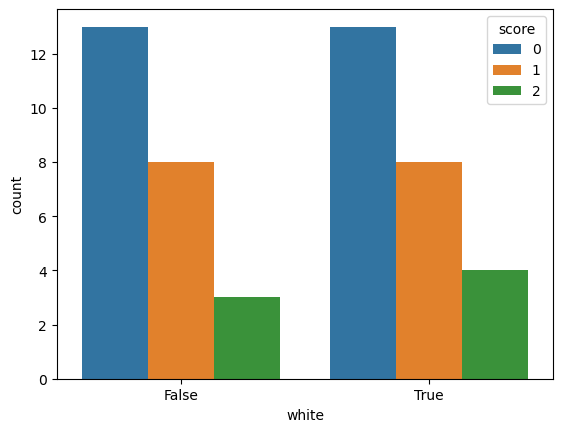

In [20]:
sns.countplot(x='white',data=gamesDfFinal, hue='score')

sns.countplot(x='hour',data=gamesDfFinal, hue='score')

<AxesSubplot:xlabel='hour', ylabel='count'>

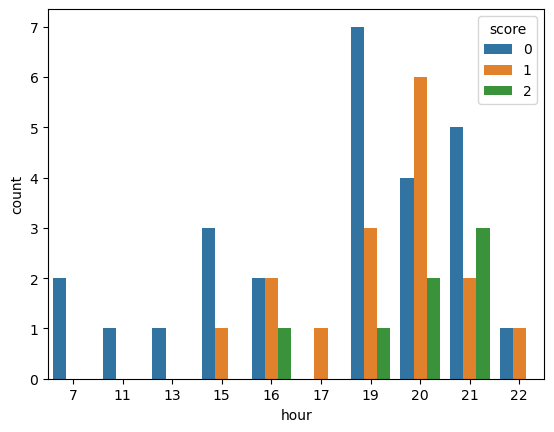

In [21]:
sns.countplot(x='hour',data=gamesDfFinal, hue='score')